# Logistic Regression

This note introduces the **Logistic Regression** algorithm using `scikit-learn`, explains the step-by-step logic behind how it works, and then demonstrates a from-scratch implementation to show that the core idea is simple and easy to build.

## What is Logistic Regression?

Logistic Regression is a method for predicting **binary outcomes** — like yes or no, 0 or 1, spam or not spam.

Instead of drawing a straight line through points like in Linear Regression, it fits an **S-shaped curve (sigmoid function)** to estimate probabilities between 0 and 1.

It learns from labeled data to find the best decision boundary and uses that to classify new inputs.

This notebook will:

- Use `scikit-learn` to demonstrate how Logistic Regression works in practice  
- Explain the logic behind it in an intuitive way  
- Show how to implement the same idea step by step from scratch  

Let’s dive into the details to understand how it works and how to implement it ourselves.

## Preparation

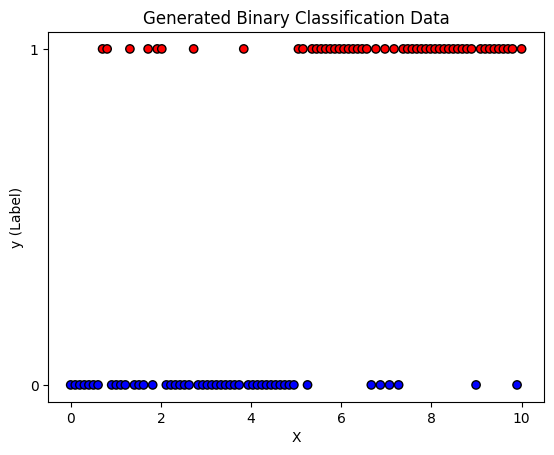

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create binary classification data
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = (X[:, 0] > 5).astype(int).reshape(-1, 1)  # label is 1 if X > 5, else 0

# Add some noise to make it less perfect
y = (y + (np.random.rand(*y.shape) > 0.8).astype(int)) % 2

# Visualize the data
plt.scatter(X, y, c=y.ravel(), cmap='bwr', edgecolors='k')
plt.title("Generated Binary Classification Data")
plt.xlabel("X")
plt.ylabel("y (Label)")
plt.yticks([0, 1])
plt.show()

## Implement with Scikit-Learn

We’ll now use `scikit-learn` to fit a **Logistic Regression model** on a **simple binary classification dataset**.

The data has a clear decision boundary around `X = 5`, and our goal is to fit a model that estimates the **probability** that a given input belongs to class 1.

Logistic Regression is perfect for this, as it models the output using a **sigmoid curve** that maps input values to a probability between 0 and 1.

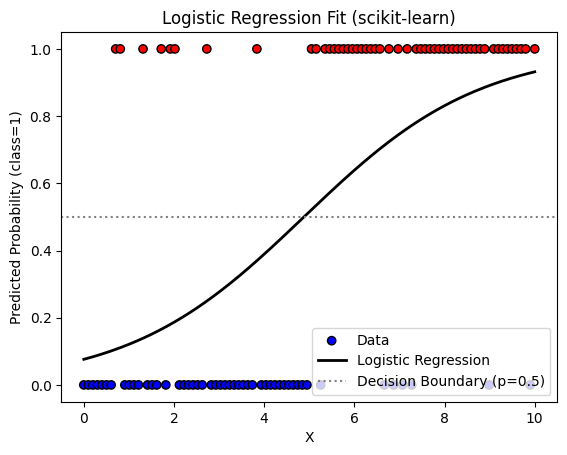

In [ ]:
from sklearn.linear_model import LogisticRegression

# Fit logistic regression model
model = LogisticRegression()
model.fit(X, y.ravel())  # y must be 1D for sklearn

# Predict probabilities for a smooth curve
X_plot = np.linspace(0, 10, 300).reshape(-1, 1)
proba = model.predict_proba(X_plot)[:, 1]  # probability of class 1

# Plot data and sigmoid curve
plt.scatter(X, y, c=y.ravel(), cmap='bwr', edgecolors='k', label="Data")
plt.plot(X_plot, proba, color='black', linewidth=2, label='Logistic Regression')
plt.axhline(0.5, color='gray', linestyle=':', label='Decision Boundary (p=0.5)')
plt.title("Logistic Regression Fit (scikit-learn)")
plt.xlabel("X")
plt.ylabel("Predicted Probability (class=1)")
plt.legend()
plt.show()

## Understanding the Visualization

The plot above shows how a **Logistic Regression model** learns to classify data into two groups — class 0 and class 1 — based on a single input feature `X`.

- The scatter points represent the raw data (blue = class 0, red = class 1)  
- The black curve shows the model’s **predicted probability** that a point belongs to class 1  
- The dashed horizontal line at **0.5** marks the **decision boundary**

Instead of predicting a number like in linear regression, Logistic Regression estimates a **probability between 0 and 1**. If the predicted probability is greater than 0.5, we classify the input as class 1.

## Behind the Scenes

### 1. The Goal

We want to find the best curve that separates two classes using a smooth transition.

Instead of predicting a real number like in linear regression:

$$
\hat{y} = w \cdot x + b
$$

We want to predict the **probability** that the output is class 1:

$$
\hat{y} = P(y = 1 \mid x)
$$

To do this, we take the output of the linear function:

$$
z = w \cdot x + b
$$

and pass it through a **sigmoid function** to transform it into a probability.

### 2. Why the Sigmoid Function?

The sigmoid function "squashes" any real number into the range $[0, 1]$:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Where:
- $z = wx + b$ is the raw score from the linear model  
- $e \approx 2.718$ is Euler’s number — the base of natural logarithms  
- $e^{-z}$ shrinks rapidly when $z$ is large and grows rapidly when $z$ is negative

This makes the sigmoid:
- Close to 1 for large positive $z$  
- Close to 0 for large negative $z$  
- Equal to 0.5 when $z = 0$ — which is our **decision boundary**

So the final model becomes:

$$
\hat{y} = \frac{1}{1 + e^{-(wx + b)}}
$$

This output $\hat{y}$ is interpreted as the **probability** that the input belongs to class 1.

### 3. How Good is the Prediction? (Loss Function)

To measure how well the model fits the classification task, we use **cross-entropy loss**, which is perfect for binary outputs.

For a single point, the loss is:

$$
J = -\left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right]
$$

This works because:
- If $y = 1$, the second term disappears: $J = -\log(\hat{y})$
- If $y = 0$, the first term disappears: $J = -\log(1 - \hat{y})$

The model is punished when it is confident in the wrong direction (e.g. predicting $\hat{y} \approx 0$ when $y = 1$).

For $n$ total points, we average the losses:

$$
J(w, b) = -\frac{1}{n} \sum_{i=1}^{n} \left[
y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i)
\right]
$$

### 4. How to Minimize the Loss? (Gradient Descent)

We want to adjust the weights $w$ and bias $b$ to minimize the cost $J(w, b)$.

To do this, we use **gradient descent**, which updates parameters step-by-step based on the slope of the loss:

$$
w := w - \alpha \cdot \frac{\partial J}{\partial w}
$$

$$
b := b - \alpha \cdot \frac{\partial J}{\partial b}
$$

Where:
- $\alpha$ is the learning rate (step size)
- The gradients are derived from the partial derivatives of the loss function

### 5. Derivatives Step-by-Step (Single Point)

Let’s look at one data point:

- Input: $x$  
- True label: $y \in \{0, 1\}$  
- Linear output: $z = wx + b$  
- Predicted probability: $\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}$

The loss is:

$$
J = -\left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right]
$$

We apply the **chain rule** to compute gradients.

We want:

$$
\frac{dJ}{dw} = \frac{dJ}{d\hat{y}} \cdot \frac{d\hat{y}}{dz} \cdot \frac{dz}{dw}
$$

$$
\frac{dJ}{db} = \frac{dJ}{d\hat{y}} \cdot \frac{d\hat{y}}{dz} \cdot \frac{dz}{db}
$$

Let’s compute each part:

- $\frac{dJ}{d\hat{y}} = -\left( \frac{y}{\hat{y}} - \frac{1 - y}{1 - \hat{y}} \right)$  
- $\frac{d\hat{y}}{dz} = \hat{y}(1 - \hat{y})$  
- $\frac{dz}{dw} = x$  
- $\frac{dz}{db} = 1$

When we multiply and simplify the chain, we get:

$$
\frac{dJ}{dw} = (\hat{y} - y) \cdot x
$$

$$
\frac{dJ}{db} = (\hat{y} - y)
$$

> This result shows that the gradient is simply the **difference between prediction and actual**, scaled by the input.

### 6. Generalizing to All Data Points

For the entire dataset of $n$ samples, we average the gradients:

$$
\frac{\partial J}{\partial w} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i) \cdot x_i
$$

$$
\frac{\partial J}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)
$$

This tells us the direction in which $w$ and $b$ should be adjusted to reduce the average prediction error.

### 7. When to Stop: Convergence Criteria

We keep updating $w$ and $b$ until one of these conditions is met:

- The loss becomes very small  
- The change in loss is smaller than a threshold (e.g., $10^{-6}$)  
- We reach the maximum number of iterations

> Logistic Regression doesn’t try to hit every point exactly.  
> It finds a smooth curve that separates the classes as well as possible — based on predicted probability.

This completes the full math logic of Logistic Regression — from raw scores to sigmoid transformation, to loss minimization using gradient descent.


## Let’s Code It

Now that we understand the math and logic behind Logistic Regression, let’s put it into practice.

Converged at iteration 908, cost: 0.504175


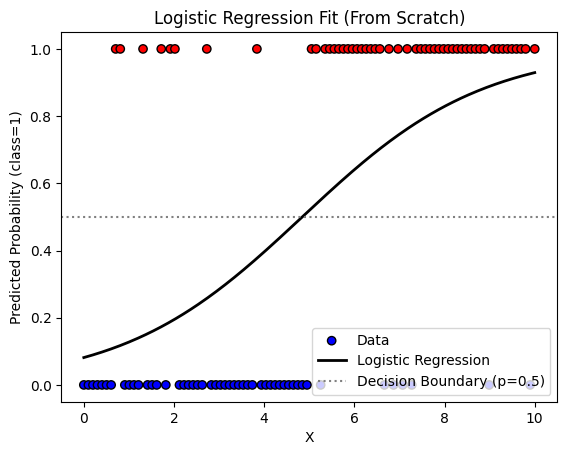

In [ ]:
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, max_iter=1000, tol=1e-6):
        # Learning rate α: controls how big each step is (Section 4)
        self.alpha = learning_rate

        # Maximum number of gradient descent iterations (Section 7)
        self.max_iter = max_iter

        # Convergence threshold: stop when loss stops improving (Section 7)
        self.tol = tol

        # Weights to be learned: w (slope), b (intercept)
        self.w = 0
        self.b = 0

    def sigmoid(self, z):
        # Sigmoid squashes input into range [0, 1] (Section 2)
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y_hat, y):
        # Cross-entropy loss for binary classification (Section 3)
        # Add epsilon to avoid log(0)
        return -np.mean(y * np.log(y_hat + 1e-15) + (1 - y) * np.log(1 - y_hat + 1e-15))

    def fit(self, X, y):
        n = len(X)

        # Start with initial guesses: w = 0, b = 0 (Section 1)
        w, b = 0.0, 0.0

        # Track previous loss to check for convergence (Section 7)
        prev_cost = float('inf')

        # Gradient Descent Loop (Section 4)
        for i in range(self.max_iter):
            # Step 1: Compute linear score z = wx + b (Section 1)
            z = w * X + b

            # Step 2: Apply sigmoid to get predicted probabilities (Section 2)
            y_hat = self.sigmoid(z)

            # Step 3: Compute binary cross-entropy loss (Section 3)
            cost = self.compute_loss(y_hat, y)

            # Step 4: Check convergence (Section 7)
            if abs(prev_cost - cost) < self.tol:
                print(f"Converged at iteration {i}, cost: {cost:.6f}")
                break
            prev_cost = cost

            # Step 5: Compute gradients using chain rule (Section 5)
            # dJ/dw = (1/n) ∑ (ŷ - y) * x
            dw = (1 / n) * np.sum((y_hat - y) * X)

            # dJ/db = (1/n) ∑ (ŷ - y)
            db = (1 / n) * np.sum(y_hat - y)

            # Step 6: Update parameters (Section 4)
            w -= self.alpha * dw
            b -= self.alpha * db

        # Save learned parameters
        self.w = w
        self.b = b

    def predict_proba(self, X):
        # Predict probability using learned weights (Section 2 again)
        z = self.w * X + self.b
        return self.sigmoid(z)

    def predict(self, X):
        # Class prediction: 1 if probability ≥ 0.5, else 0
        return (self.predict_proba(X) >= 0.5).astype(int)

model = MyLogisticRegression(learning_rate=0.1, max_iter=1000)
model.fit(X, y)

X_plot = np.linspace(0, 10, 300).reshape(-1, 1)
proba = model.predict_proba(X_plot)

plt.scatter(X, y, c=y.ravel(), cmap='bwr', edgecolors='k', label="Data")
plt.plot(X_plot, proba, color='black', linewidth=2, label='Logistic Regression')
plt.axhline(0.5, color='gray', linestyle=':', label='Decision Boundary (p=0.5)')
plt.title("Logistic Regression Fit (From Scratch)")
plt.xlabel("X")
plt.ylabel("Predicted Probability (class=1)")
plt.legend()
plt.show()

## It Works!!

The probability curve produced by our scratch implementation closely matches the result from **scikit-learn**.

This confirms that the gradient descent logic — computing the cross-entropy loss, applying the chain rule, and updating the parameters — behaves exactly as expected.

We've successfully built **Logistic Regression** from the ground up!